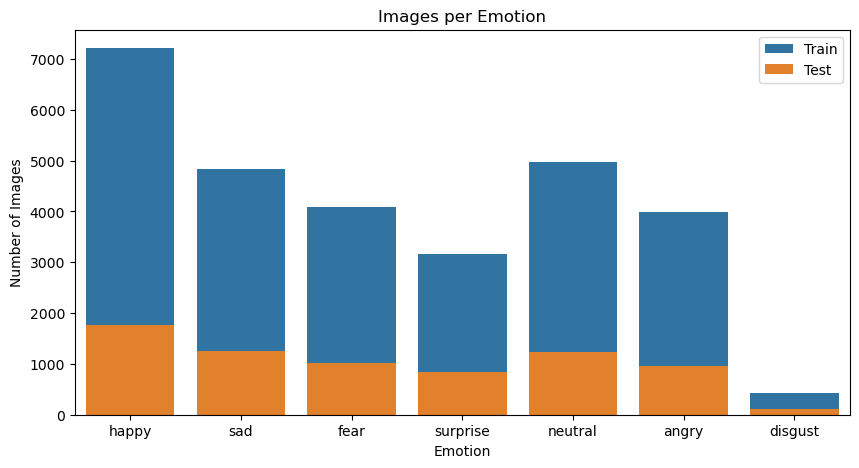

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


DATASET_PATH = "../Data"

train_path = os.path.join(DATASET_PATH, "train")
test_path = os.path.join(DATASET_PATH, "test")

# get num of images in each category
def count_images_per_category(base_path):
    categories = os.listdir(base_path)
    category_counts = {category: len(os.listdir(os.path.join(base_path, category))) for category in categories}
    return category_counts

# get num of images from train and test sets
train_counts = count_images_per_category(train_path)
test_counts = count_images_per_category(test_path)

# Barplot of images per category
plt.figure(figsize=(10, 5))
sns.barplot(x=list(train_counts.keys()), y=list(train_counts.values()), label="Train")
sns.barplot(x=list(test_counts.keys()), y=list(test_counts.values()), label="Test")
plt.xlabel("Emotion")
plt.ylabel("Number of Images")
plt.title("Images per Emotion")
plt.legend()
plt.show()


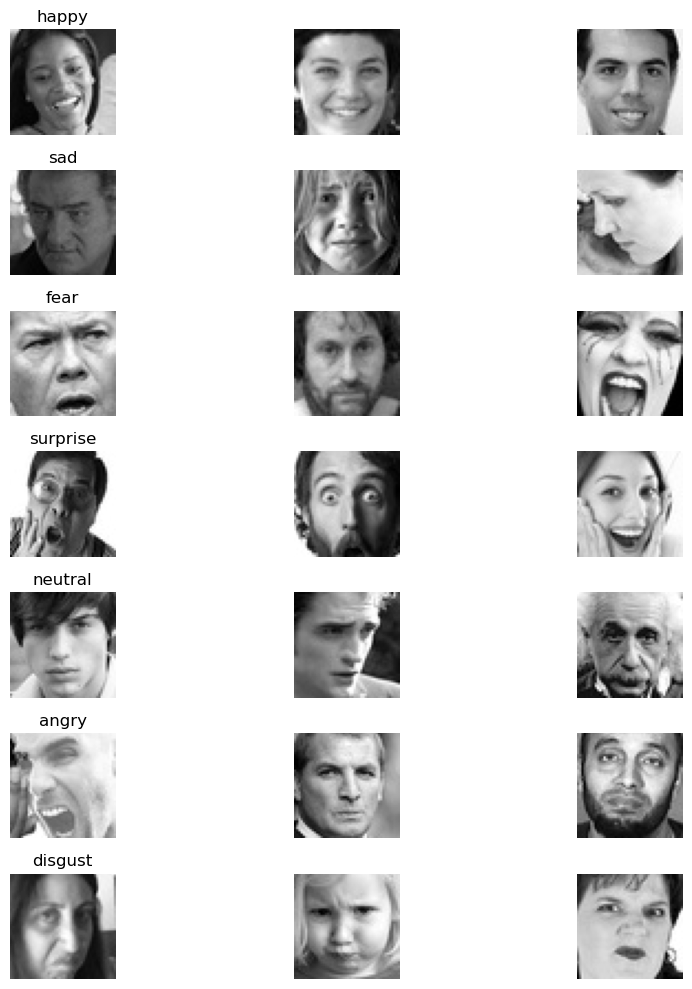

In [4]:
# Show sample images
def show_sample_images(base_path, categories, num_samples=3):
    fig, axes = plt.subplots(len(categories), num_samples, figsize=(10, 10))
    for i, category in enumerate(categories):
        category_path = os.path.join(base_path, category)
        sample_files = np.random.choice(os.listdir(category_path), num_samples, replace=False)
        for j, file in enumerate(sample_files):
            img_path = os.path.join(category_path, file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            axes[i, j].imshow(img, cmap="gray")
            axes[i, j].axis("off")
            if j == 0:
                axes[i, j].set_title(category)
    plt.tight_layout()
    plt.show()

show_sample_images(train_path, list(train_counts.keys()))

In [5]:
# Print number of images per category for train and test sets
print("Number of images per emotion category:\n")

print("Training Set:")
for emotion, count in train_counts.items():
    print(f"{emotion}: {count} images")

print("\nTest Set:")
for emotion, count in test_counts.items():
    print(f"{emotion}: {count} images")

# Total images in train and test sets
total_train = sum(train_counts.values())
total_test = sum(test_counts.values())

print(f"\nTotal training images: {total_train}")
print(f"Total test images: {total_test}")
print(f"Total images in dataset: {total_train + total_test}")


Number of images per emotion category:

Training Set:
happy: 7215 images
sad: 4830 images
fear: 4097 images
surprise: 3171 images
neutral: 4965 images
angry: 3995 images
disgust: 436 images

Test Set:
happy: 1774 images
sad: 1247 images
fear: 1024 images
surprise: 831 images
neutral: 1233 images
angry: 958 images
disgust: 111 images

Total training images: 28709
Total test images: 7178
Total images in dataset: 35887


In [8]:
import pandas as pd

#DataFrame for train, test, and total counts
df = pd.DataFrame({
    "Emotion": list(train_counts.keys()),
    "Train Count": list(train_counts.values()),
    "Test Count": [test_counts[emotion] for emotion in train_counts.keys()]
})

#total
df["Total Count"] = df["Train Count"] + df["Test Count"]

df.set_index("Emotion", inplace=True)
print(df)

# totals
total_train = df["Train Count"].sum()
total_test = df["Test Count"].sum()
total_images = total_train + total_test

print(f"\nTotal training images: {total_train}")
print(f"Total test images: {total_test}")
print(f"Total images in dataset: {total_images}")


          Train Count  Test Count  Total Count
Emotion                                       
happy            7215        1774         8989
sad              4830        1247         6077
fear             4097        1024         5121
surprise         3171         831         4002
neutral          4965        1233         6198
angry            3995         958         4953
disgust           436         111          547

Total training images: 28709
Total test images: 7178
Total images in dataset: 35887
